In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Чтение файла 

In [2]:
# менять данную константу, если нужно сменить имя файла
FILE = 'done-12.xlsx'

In [3]:
# читаем данные
data_full = pd.read_excel(FILE, index_col=0)

In [28]:
data = pd.read_excel("12.xlsx", index_col=0)
data.columns

Index(['1) Если Вы используете смартфон, являетесь ли Вы его первым владельцем?',
       '2) Относится ли Ваш смартфон к среднему ценовому диапазону (10 000 – 20 000 рублей)',
       '3) Какой марки Ваш смартфон?',
       '4) Операционная система Вашего мобильного устройства',
       '5) Диагональ экрана', '6) Количество мегапикселей основной камеры',
       '7) Количество мегапикселей фронтальной камеры',
       '8) Объем оперативой памяти', '9) Объем встроенной памяти',
       '10) Емкость аккумултора',
       '11) Что из нижеперечисленного повлияло на Ваш выбор?',
       '12) Что было для Вас главным при выборе смартфона?',
       '13) С какой целью Вы, чаще всего, пользуетесь своим мобильным устройством? (Укажите не более 3 вариантов)',
       '15) Каким принципом Вы руководствуетесь при покупке мобильного устройства?',
       '16) Следите ли Вы за появлением новинок на рынке мобильных устройств?',
       '14) Как часто Вы меняете смартфон?',
       '17) Какое общее впечатление от 

In [105]:
### марки
for mark in data['3) Какой марки Ваш смартфон?'].unique():
    if mark==mark:
        print("\n *************")
        print(mark)
        print("*************")
        make_table = data.loc[data['3) Какой марки Ваш смартфон?'] == mark]
        for col in range(7):
            values = make_table.iloc[:, -(col+1)].value_counts()
            print("    >>>>>>>")
            print(values)
#data.loc[data.iloc[:, 1] == '18 – 24'].values.value_counts()
#data.iloc[:, 1] == '18 – 24'


 *************
Apple
*************
    >>>>>>>
Нет детей      8
1 ребёнок      3
3-4 ребёнка    2
2 ребёнка      2
Name: 25) Есть ли у Вас дети, не достигшие возраста 18-ти лет?, dtype: int64
    >>>>>>>
Замужем / женат           11
Не замужем / не  женат     4
Name: 24) Семейное положение, dtype: int64
    >>>>>>>
Работаю                       10
Не работаю, ищу работу         3
Не работаю и не ищу работу     2
Name: 23) Ваша занятость, dtype: int64
    >>>>>>>
Средне специальное                                   5
Высшее профессиональное                              5
Среднее                                              3
Без образования или неполное основное образование    1
Основное                                             1
Name: 22) Какой ваш самый высокий уровень образования?, dtype: int64
    >>>>>>>
50 001 – 100 000 рублей    6
До 25 000 рублей           4
Более 100 000 рублей       3
25 000 – 50 000 рублей     2
Name: 21)  Доход семьи в месяц, dtype: int64
    >>>>>>>
25 

In [106]:
### частота смены
for mark in data['14) Как часто Вы меняете смартфон?'].unique():
    if mark==mark:
        print("\n *************")
        print(mark)
        print("*************")
        make_table = data.loc[data['14) Как часто Вы меняете смартфон?'] == mark]
        for col in range(7):
            values = make_table.iloc[:, -(col+1)].value_counts()
            print("    >>>>>>>")
            print(values)


 *************
Примерно раз в 2-3 года
*************
    >>>>>>>
Нет детей      64
1 ребёнок      23
2 ребёнка      14
3-4 ребёнка     2
Name: 25) Есть ли у Вас дети, не достигшие возраста 18-ти лет?, dtype: int64
    >>>>>>>
Не замужем / не  женат    55
Замужем / женат           48
Name: 24) Семейное положение, dtype: int64
    >>>>>>>
Работаю                       65
Не работаю и не ищу работу    21
Не работаю, ищу работу        16
Не работаю,ищу работу          1
Name: 23) Ваша занятость, dtype: int64
    >>>>>>>
Высшее профессиональное                                            34
Среднее                                                            33
Средне специальное                                                 24
Ученая степень (магистр, кандидат, доктор наук и эквивалентное)     5
Основное                                                            4
Без образования или неполное основное образование                   3
Name: 22) Какой ваш самый высокий уровень образования?, d

In [4]:
# Количество данных в пакете
Nr = 50
# Количество анкет
N0 = len(data_full.index) 
packets_num = N0//Nr + 1

In [5]:
# делаем пакетную индексацию
data_packet = data_full.copy()
n_packets = N0//Nr
index1 = []
for i in range(n_packets):
    index1 = index1 + [i]*Nr
else:
    index1 = index1 + [n_packets]*(N0 - Nr*n_packets)
indexies = []
indexies.append(index1)
indexies.append(data_packet.index)
data_packet.index = indexies

In [6]:
#data_packet.head(10)

In [7]:
#data_packet.index.get_level_values(0).unique()
#data_packet.loc[data_packet.index.get_level_values(0) != 1]#.head(10)
#data_packet.index.levels[0]

## 1) Фильтр отсутствия данных

In [8]:
# принимаем данные
DATA1 = data_full.copy()

Формируем набор $\phi_i $

In [9]:
import pheta_i as ph # функция подсчета pheta_i

In [30]:
# работа фильтра
pheta_i = ph.make_pheta_i(DATA1)
pheta_i = pheta_i.sort_values(ascending=False)

Визуализируем

Отметка времени
2015-11-29 00:44:48.832    0.683034
2015-12-01 15:28:33.576    0.683034
2015-11-28 22:02:12.267    0.683034
2015-12-01 15:08:55.786    0.683034
2015-12-01 15:08:21.336    0.683034
2015-12-01 14:43:21.908    0.683034
2015-12-01 15:27:27.147    0.683034
2015-12-01 15:23:02.265    0.672995
2015-12-01 15:24:30.045    0.672995
2015-12-02 15:27:09.000    0.672995
dtype: float64

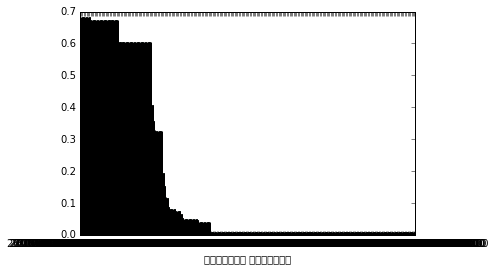

In [32]:
pheta_i[pheta_i>0].plot(kind='bar', xticks=[], colormap='summer')
pheta_i.head(10)

In [54]:
#Константа для порогового значения, больше этого значения анкеты убираем
THRESHOLD1 = 0.65
FILTER1 = pheta_i[pheta_i>THRESHOLD1] # Фильтруем
print("Будет удалено {} записей".format(len(FILTER1)))

Будет удалено 28 записей


In [55]:
new_data1 = DATA1.drop(FILTER1.index) # создаем новые данные

In [56]:
#new_data1.to_excel("after_1_filter.xlsx") # сохраняем

##  2) Фильтр отсутствия данных групповой

In [33]:
DATA2 = data_packet.copy() # принимаем данные

In [34]:
# работа фильтра
pheta_i = ph.make_pheta_i(DATA2) # делаем массив pheta_i

In [35]:
# считаем необходимые для фильтра коэффициенты
Wr =  pheta_i.groupby(level=0).sum()/pheta_i.groupby(level=0).count()
ss_pheta = pheta_i.sum()
W_minus_r = (ss_pheta - pheta_i.groupby(level=0).sum()) / (N0 - pheta_i.groupby(level=0).count())
Vr = W_minus_r - Wr

Визуализируем

Packets
4   -0.089483
2   -0.086872
1    0.037610
3    0.049938
0    0.080504
dtype: float64

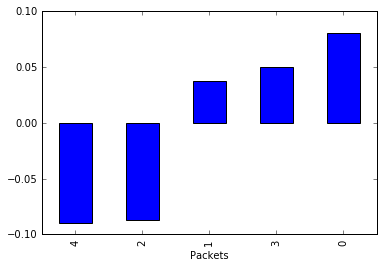

In [36]:
Vr.index.name = "Packets"
Vr.sort_values().plot(kind='bar')
Vr.sort_values().head()

In [61]:
#Константа для порогового значения, ниже этого значения анкеты убираем
THRESHOLD2 = -0.01
FILTER2 = Vr[Vr < THRESHOLD2]
print("Будет удалено {} пакета(ов)".format(len(FILTER2)))

Будет удалено 2 пакета(ов)


In [62]:
new_data2 = DATA2.drop(FILTER2.index) # создаем новые данные

In [63]:
#new_data2.to_excel("after_2_filter.xlsx") # сохраняем

## 3) Фильтр экстремальных непрерывных значений

In [37]:
DATA3 = data_packet.copy() # принимаем данные

In [38]:
# работа фильтра
import lambd as lb
lambd = lb.make_lambd(DATA3, packets_num)
max_lambd = lambd == lambd.max()
Mu_i = max_lambd.sum(axis=1)

Визуализируем

Packets
0    6.5
1    6.0
3    5.0
2    3.0
4    1.0
dtype: float64

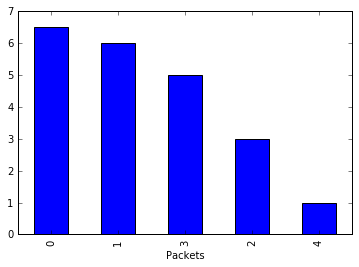

In [39]:
Mu_i = Mu_i.sort_values(ascending=False)
Mu_i.loc[0]=6.5
Mu_i.index.name = "Packets"
Mu_i.plot(kind='bar', x='packets')
Mu_i.head()

In [67]:
#Константа для порогового значения, ниже этого значения анкеты убираем
THRESHOLD3 = 8

FILTER3 = Mu_i[Mu_i > THRESHOLD3]
print("Будет удалено {} пакета(ов)".format(len(FILTER3)))

Будет удалено 1 пакета(ов)


In [68]:
new_data3 = DATA3.drop(FILTER3.index) # создаем новые данные

In [69]:
#new_data3.to_excel("after_3_filter.xlsx") # сохраняем

## 4) Фильтр ранжирования непрерывных значений

In [41]:
DATA4 = data_packet.copy() # принимаем данные

Альтернативный алгоритм

In [42]:
X_r1 = DATA4.groupby(level=0).mean()
X_minus_r1=DATA4.groupby(level=0).apply(lambda row,group: DATA4.loc[DATA4.index.get_level_values(0) != group].mean(), 1)
lambd4 = X_minus_r1 - X_r1

Packets
0    90.0
2    84.5
3    72.0
1    65.0
4    63.5
dtype: float64

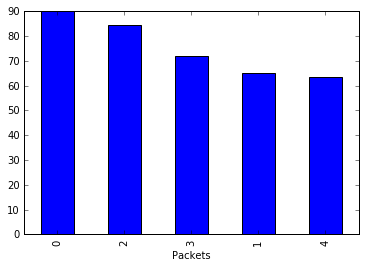

In [43]:
rank_lambd = lambd4.rank()
M_4 = rank_lambd.sum(axis=1)
M_4 = M_4.sort_values(ascending=False)
M_4.index.name = "Packets"
M_4.plot(kind='bar')
M_4.head()

Альтернатива кончилась

In [78]:
# работа фильтра
lambd4 = lb.make_lambd(DATA4, packets_num)
rank_lambd = lambd4.rank()
M_4 = rank_lambd.sum(axis=1)

Визуализируем

Packets
0    89.0
2    84.5
3    71.5
4    65.0
1    65.0
dtype: float64

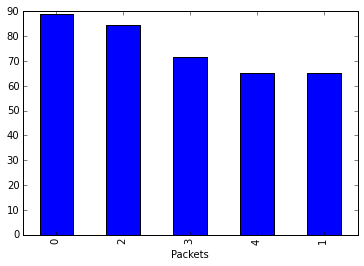

In [79]:
M_4 = M_4.sort_values(ascending=False)
M_4.index.name = "Packets"
M_4.plot(kind='bar')
M_4.head()

In [33]:
#Константа для порогового значения, ниже этого значения анкеты убираем
THRESHOLD4 = 80

FILTER4 = M_4[M_4 > THRESHOLD4]
print("Будет удалено {} пакета(ов)".format(len(FILTER4)))

Будет удалено 2 пакета(ов)


In [34]:
new_data4 = DATA4.drop(FILTER4.index) # создаем новые данные

In [35]:
#new_data4.to_excel("after_4_filter.xlsx") # сохраняем

## 5) Фильтр метрический непрерывных значений

In [45]:
DATA5 = data_full.copy() # принимаем данные
#DATA5.apply(lambda row: row.name , axis=1)
X = DATA5.copy()
X_minus_i = DATA5.apply(lambda row: DATA5.loc[DATA5.index != row.name].mean() , axis=1)

### Расстояние Евклида

In [46]:
# Расстояние Евклида
P_e = np.sqrt(np.square(X - X_minus_i).sum(1))
P_e = P_e.sort_values(ascending=False)

Отметка времени
2015-11-24 16:12:54.851    62.303939
2015-11-29 11:02:35.022    61.854194
2015-11-29 01:54:58.565    61.472645
2015-11-29 12:08:48.359    58.731171
2015-11-29 12:37:35.778    57.787938
dtype: float64

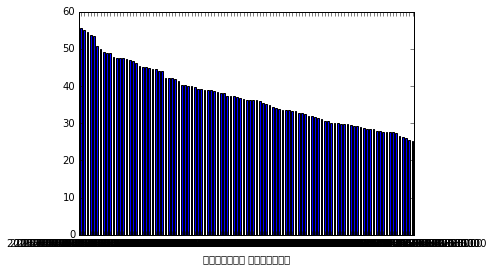

In [56]:
P_e_l = P_e[57>P_e]
P_e_l[P_e_l>25].plot(kind='bar', xticks=[])
P_e.head()

In [53]:
#Константа для порогового значения, ниже этого значения анкеты убираем
THRESHOLD5_1 = 20

FILTER5_1 = P_e[P_e > THRESHOLD5_1]
print("Будет удалено {} записей".format(len(FILTER5_1)))

Будет удалено 134 записей


In [84]:
new_data5_1 = DATA5.drop(FILTER5_1.index) # создаем новые данные
#new_data5_1.to_excel("after_5_1_filter.xlsx") # сохраняем

### Расстояние Хэмминга

In [57]:
P_x = np.abs(X - X_minus_i).sum(1)
P_x = P_x.sort_values(ascending=False)

Отметка времени
2015-11-29 19:37:22.883    118.595241
2015-11-28 20:24:23.080    116.159175
2015-11-29 01:54:58.565    112.654400
2015-11-25 00:04:09.927    108.817996
2015-11-29 11:02:35.022    106.841584
dtype: float64

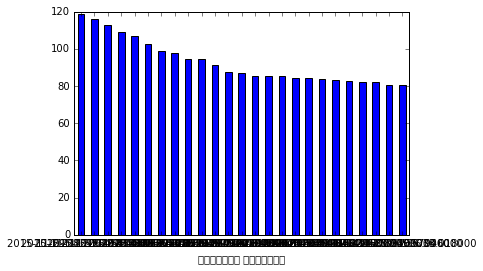

In [68]:
P_x[P_x>80].plot(kind='bar', xticks=[])
P_x.head()

In [67]:
#Константа для порогового значения, ниже этого значения анкеты убираем
THRESHOLD5_2 = 45

FILTER5_2 = P_x[P_x > THRESHOLD5_2]
print("Будет удалено {} записей".format(len(FILTER5_2)))

Будет удалено 143 записей


In [88]:
new_data5_2 = DATA5.drop(FILTER5_2.index) # создаем новые данные
#new_data5_2.to_excel("after_5_2_filter.xlsx") # сохраняем

### Расстояние Махаланобиса

In [69]:
# NaN-значения испортят все вычисления, нужно их обнулить
X_stable = X.fillna(0)

def calculate(row):
    x_i_x_minus = (row - X_minus_i.loc[row.name])
    
    x_cov_i = X_stable.loc[X_stable.index != row.name].cov()
    #print(x_cov_i)
    return x_i_x_minus.dot(x_cov_i).dot(x_i_x_minus.transpose())

P_m = X_stable.apply(calculate, axis=1)

# Почему-то породились 2 массива вида: array([[ 8.34035809,  8.34035809],[ 8.34035809,  8.34035809]]). 
# Понятия не имею, как они могли появиться. Возможно, в Pandas DataFrame представлен несколькими 
# фреймами, а данные функции пытаются эту сложность обойти, но плохо получается.
# Возможно, это глубокий баг, с которым никто не хочет возиться.

def fixer(val):
    if type(val) == np.ndarray:
        return val[0][0]
    else:
        return val

P_m = P_m.apply(fixer)
P_m = P_m.sort_values(ascending=False)

Отметка времени
2015-12-01 15:24:30.045    2718015.312649
2015-12-01 15:23:02.265    2717997.876808
2015-11-24 17:13:24.873    2717965.606422
2015-11-30 20:37:25.482    2717822.638049
2015-12-01 15:10:27.311    2717706.986139
2015-11-30 16:34:34.458    2717522.959036
2015-12-01 15:10:58.302    2717469.174631
2015-11-24 16:50:05.481    2717383.799825
2015-11-24 16:35:30.310    2717320.827107
2015-11-28 22:01:39.612    2717122.653336
dtype: float64

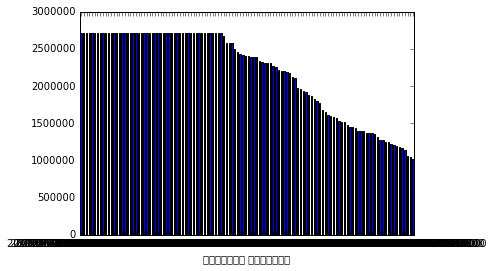

In [100]:
P_m_l = P_m[P_m<2800000]
P_m_l[P_m_l>1000000].plot(kind='bar', xticks=[])
P_m_l.head(10)

In [101]:
#Константа для порогового значения, ниже этого значения анкеты убираем
THRESHOLD5_3 = 1000000

FILTER5_3 = P_m[P_m > THRESHOLD5_3]
print("Будет удалено {} записей".format(len(FILTER5_3)))

Будет удалено 133 записей


In [92]:
new_data5_3 = DATA5.drop(FILTER5_3.index) # создаем новые данные
#new_data5_3.to_excel("after_5_3_filter.xlsx") # сохраняем

## 6) Фильтр частот кодирования

In [102]:
DATA6 = data_packet.copy() # принимаем данные

In [103]:
# работа фильтра
lambd_col_pack= pd.DataFrame(columns=DATA6.columns, index = DATA6.index.levels[0])
#sum - умная функция, игнорирующая nan

for col in tuple(DATA6):
    for packet in range(packets_num):
        
        val_freq_pack = DATA6[col][packet].value_counts() / len(DATA6[col][packet])
        out_data = DATA6[col][DATA6.index.get_level_values(0) != packet]
        val_freq_out = out_data.value_counts() / len(out_data)
       
        l_i_j = ((val_freq_out - val_freq_pack)**2 / val_freq_out).sum()
        lambd_col_pack[col][packet] = l_i_j

unique_list = []        
for col in tuple(DATA6):
    unique_list.append(len(DATA6[col].unique())) 

unique_list = np.array(unique_list)
ss_f = unique_list.sum()
Mu_r = (lambd_col_pack*unique_list / ss_f).sum(1)
Mu_r  = Mu_r.sort_values(ascending=False)

0    0.637680
3    0.542227
1    0.475396
2    0.423533
4    0.417782
dtype: float64

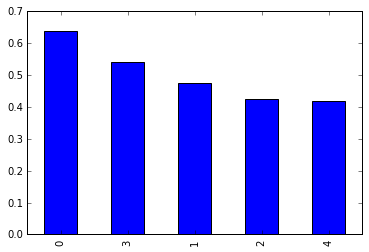

In [106]:
Mu_r.loc[0] = 0.63768
Mu_r[Mu_r>0].plot(kind='bar')
Mu_r.head()

In [106]:
#Константа для порогового значения, ниже этого значения анкеты убираем
THRESHOLD6 = 0.6

FILTER6 = Mu_r[Mu_r > THRESHOLD6]
print("Будет удалено {} записей".format(len(FILTER6)))

Будет удалено 1 записей


In [107]:
new_data6 = DATA6.drop(FILTER6.index) # создаем новые данные
#new_data5_3.to_excel("after_5_3_filter.xlsx") # сохраняем

## 7) Фильтр замены кодированных значений

In [107]:
DATA7 = data_packet.copy() # принимаем данные

In [108]:
# работа фильтра
A = pd.DataFrame()
for col in DATA7:
    val_frequency = dict(DATA7[col].value_counts())
    A[col] = DATA7[col].map(val_frequency)
A = A/len(A.index)
A = A.sum(axis=1)

Визуализируем

   Отметка времени        
1  2015-11-29 09:50:01.983    8.750000
0  2015-11-24 16:58:34.352    8.733607
2  2015-11-18 06:44:33.302    8.627049
3  2015-11-24 20:37:28.534    8.614754
4  2015-11-28 23:15:00.021    8.508197
dtype: float64

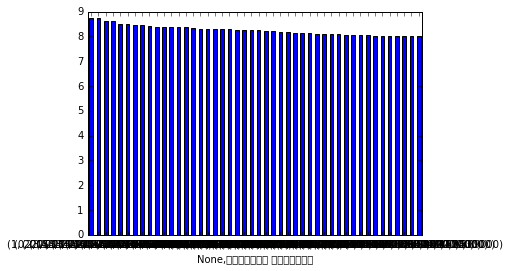

In [117]:
A = A.sort_values(ascending=False)
A_l = A[A<9]
A_l[A_l>8].plot(kind='bar', xticks = [])
A_l[A_l>8].head()

In [118]:
#Константа для порогового значения, ниже этого значения анкеты убираем
THRESHOLD7 = 8

FILTER7 = A_l[A_l > THRESHOLD7]
print("Будет удалено {} записей".format(len(FILTER7)))

Будет удалено 46 записей


In [112]:
new_data7 = DATA7.drop(FILTER7.index) # создаем новые данные

In [113]:
#new_data7.to_excel("after_7_filter.xlsx") # сохраняем